# Cython implementation of Dynamic Time Warp and DTW Barycenter averaging

ANOTHER ONE?!

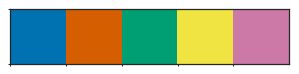

In [83]:
import sys
import os
from glob import glob
import re

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from cydtw import dtw, dba

## Default plotting params

%matplotlib inline
sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=2, style=style)
pal = sns.color_palette(['#0072b2', '#d55e00', '#009e73', '#f0e442', '#cc79a7'])
cmap = ListedColormap(pal.as_hex())
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

In [136]:
def time_warp(seq, prob_insertion=0.4, prob_deletion=0.4):
    p = prob_insertion
    q = prob_insertion + prob_deletion
    warped_seq = []
    i = 0
    while i < len(seq):
        r = np.random.random()
        if r < p:
            warped_seq.append(seq[i])
        elif r < q:
            i +=1
        else:
            warped_seq.append(seq[i])
            i += 1
    return np.interp(x=np.linspace(0, 1, len(seq)),
                     xp=np.linspace(0, 1, len(warped_seq)),
                     fp=np.array(warped_seq))

def add_noise(seq, scale=0.1):
    return seq + np.random.normal(scale=scale, size=len(seq))

In [137]:
X = np.concatenate([
    np.repeat(0.5, 10),
    np.repeat(0.1, 20),
    np.repeat(0.8, 5),
    np.repeat(0.6, 10),
    np.repeat(0.4, 5),
    np.repeat(0.8, 3),
    np.repeat(0.6, 10),
    np.repeat(0.7, 20),
    np.repeat(0.1, 10)
])

In [138]:
time_warped = np.array([add_noise(time_warp(X, np.random.random() / 2, np.random.random() / 4)) for _ in range(100)])

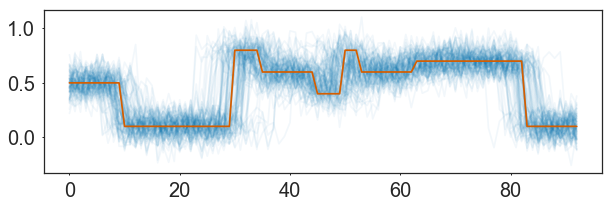

In [139]:
fig, ax = plt.subplots(figsize=(10, 3))
for x in time_warped:
    plt.plot(x, c=pal[0], alpha=0.05)
plt.plot(X, color=pal[1])
plt.show()

In [140]:
a = dba(time_warped, n_iter=50, tol=0.001)

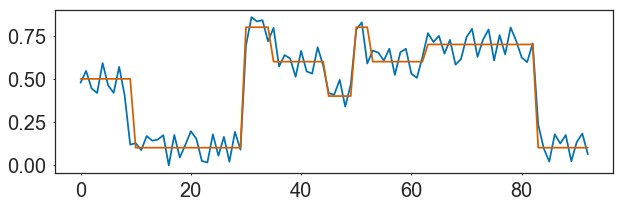

In [141]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(a)
plt.plot(X)

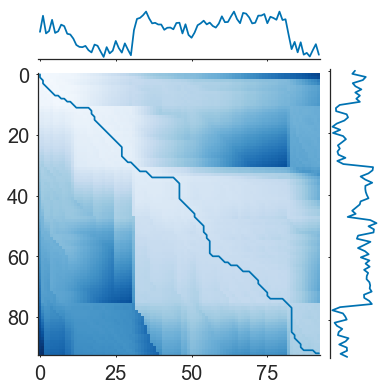

In [142]:
i = 44
j = 22
mat, path = dtw(time_warped[i], time_warped[j], backtrack=True)
g = sns.JointGrid(x=path[:, 1], y=path[:, 0])
g.ax_marg_x.plot(time_warped[j])
g.ax_marg_y.plot(time_warped[i], np.arange(len(X)))
g.ax_joint.imshow(mat, cmap='Blues')
g.plot_joint(plt.plot)
plt.show()